In [69]:
import pandas as pd
import numpy as np

In [70]:
stratified_computer_prices = pd.read_csv("../data/stratified_computer_prices_sample.csv")

stratified_computer_prices[['resolution_width', 'resolution_height']] = stratified_computer_prices['resolution'].str.split('x', expand=True).astype(int)
stratified_computer_prices['aspect_ratio'] = np.round(stratified_computer_prices['resolution_width'] / stratified_computer_prices['resolution_height'], 2)
stratified_computer_prices.drop('resolution', axis=1, inplace=True)

def extract_cpu_type(cpu_model):
    parts = cpu_model.replace("-", " ").split()

    if parts[0] in ["AMD", "Intel"]:
        parts = parts[:-1]
        
    parts = parts[1:]

    return " ".join(parts).strip()

stratified_computer_prices['cpu_type'] = stratified_computer_prices['cpu_model'].apply(extract_cpu_type)
stratified_computer_prices.drop(['model', 'cpu_model'], axis=1, inplace=True)

In [71]:
from sklearn.feature_selection import mutual_info_regression

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\bekasker\AppData\Local\Temp\ipykernel_12816\345646905.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mi_score', y='feature', data=mi_df, palette='viridis')


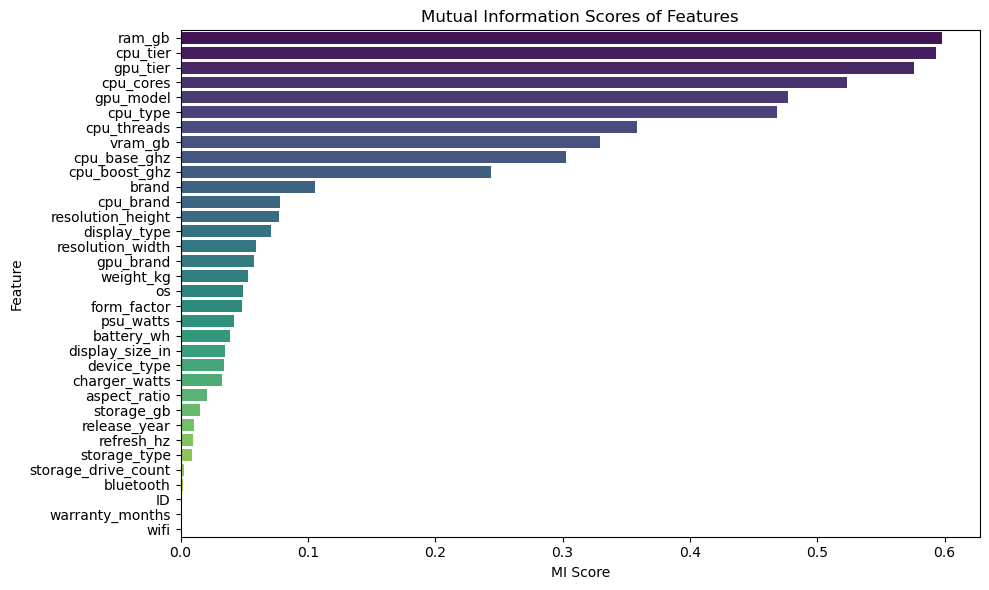

In [72]:
X = stratified_computer_prices.copy()
y = X.pop("price")

feature_names = X.columns.tolist()

for colname in X.select_dtypes("object"): 
    X[colname], _ = X[colname].factorize()

mi_scores = mutual_info_regression(X, y)

mi_df = pd.DataFrame({'feature': feature_names, 'mi_score': mi_scores}).sort_values(by='mi_score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='mi_score', y='feature', data=mi_df, palette='viridis')

plt.title('Mutual Information Scores of Features')
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()